#### Objective

Provide various solutions to the data challenges at Ultimate Technologies Inc., a worldwide online transportation network prestigious company headquartered in San Francisco that have greatly disrupted the taxi and logistics industry.


#### EDA
We are given a logins.json data file that contains (simulated) timestamps of user logins in a particular geographic locations, and we are asked to complete several tasks and challenges. We first load and examine our data.

In [2]:
# Import relevant packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load provided logins data
logins = pd.read_json('/Users/kaizen/Data Science/Springboard/Challenges/ultimate_challenge/logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
# Examine dataframe info
logins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


In [4]:
# Check logins summary statistics
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


Our first given challenge is to aggregate the above login counts basd on 15-minute time intervals.

In [6]:
# Move our login times to the index
indexed_logins_df = logins.set_index(['login_time'])
indexed_logins_df.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [7]:
# Counting each 15-minute interval
indexed_logins_df['count'] = 1
indexed_logins_df_15T = indexed_logins_df.resample('15T').count()
indexed_logins_df_15T = indexed_logins_df_15T.reset_index()
indexed_logins_df_15T.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


Next, we are asked to visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand, and also to report/illustrate any data quality issues and important features of the demand, such as daily cycles.

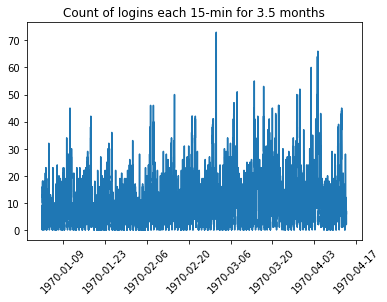

In [8]:
# Display plot of counts for all 15-minute intervals 
x = indexed_logins_df_15T['login_time']
y = indexed_logins_df_15T['count']
plt.plot(x, y)
plt.title('Count of logins each 15-min for 3.5 months')
plt.xticks(rotation=45);

We observe that there is cyclical pattern to indicate popular and unpopular login times and days. We now look to see if there are underlying patterns of demand on a monthly basis

In [9]:
# Creating tables for each month
jan = indexed_logins_df_15T[(indexed_logins_df_15T.login_time > '1970-01')
                           & (indexed_logins_df_15T.login_time < '1970-02')]
feb = indexed_logins_df_15T[(indexed_logins_df_15T.login_time > '1970-02')
                           & (indexed_logins_df_15T.login_time < '1970-03')]
mar = indexed_logins_df_15T[(indexed_logins_df_15T.login_time > '1970-03')
                           & (indexed_logins_df_15T.login_time < '1970-04')]
apr = indexed_logins_df_15T[(indexed_logins_df_15T.login_time > '1970-04')
                           & (indexed_logins_df_15T.login_time < '1970-05')]

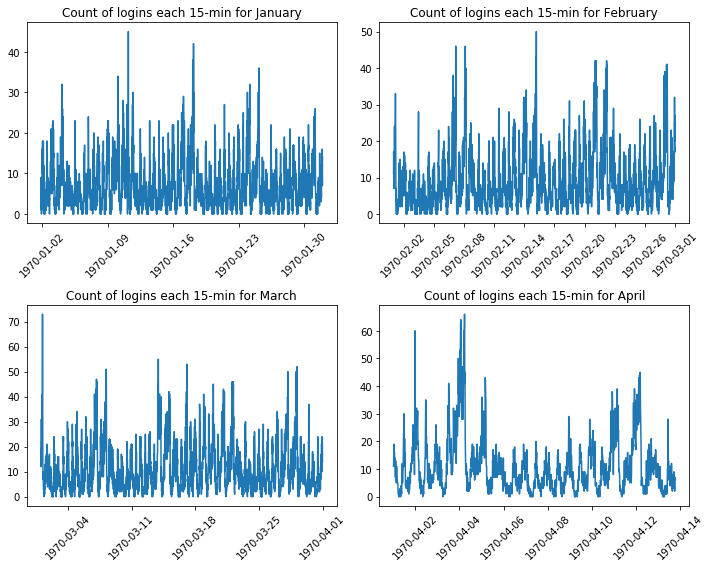

In [16]:
# Plotting monthly logins for all 4 months
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
x = jan['login_time']
y = jan['count']
plt.plot(x, y)
plt.title('Count of logins each 15-min for January')
plt.xticks(rotation=45);

plt.subplot(2,2,2)
x = feb['login_time']
y = feb['count']
plt.plot(x, y)
plt.title('Count of logins each 15-min for February')
plt.xticks(rotation=45);

plt.subplot(2,2,3)
x = mar['login_time']
y = mar['count']
plt.plot(x, y)
plt.title('Count of logins each 15-min for March')
plt.xticks(rotation=45);

plt.subplot(2,2,4)
x = apr['login_time']
y = apr['count']
plt.plot(x, y)
plt.title('Count of logins each 15-min for April')
plt.xticks(rotation=45);
plt.tight_layout()
plt.show()

We see above that the up and down patterns are seen again but they are less regular compare to before. We will next dive deeper into the patterns of each week. 

In [17]:
# Login counts based on days of the week, 0 = Monday, 6 = Sunday
indexed_logins_df_15T['weekday'] = indexed_logins_df_15T[
    'login_time'].dt.dayofweek
wkday = indexed_logins_df_15T.sort_values(by='count', ascending=False)
wkday_counts = wkday[['count', 'weekday']]
wkday_count = wkday_counts.groupby('weekday').sum().reset_index()
wkday_count

,weekday,count
0,0,8823
1,1,9268
2,2,10339
3,3,11960
4,4,15208
5,5,19377
6,6,18167


We see in the above table that there is a definite increased in demand as the week progressses starting on Monday and peaking on Saturdays and Sundays.

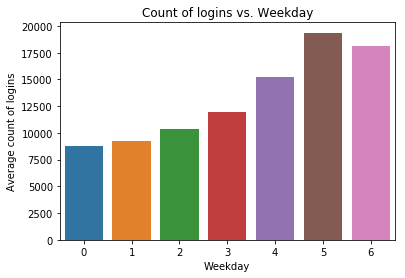

In [21]:
# Visualizing count of logins vs. weekday
sns.barplot(x='weekday', y='count', data=wkday_count)
plt.ylabel('Average count of logins')
plt.xlabel('Weekday')
plt.title('Count of logins vs. Weekday')
plt.show()

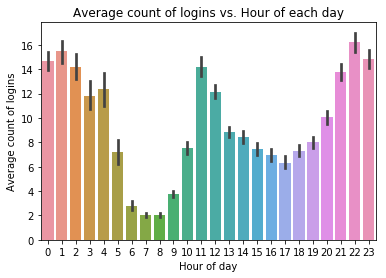

In [23]:
# Next, we will dive deeper by plotting patterns of logins in hours of the day

# Splitting into hours
indexed_logins_df_15T['hour'] = indexed_logins_df_15T[
    'login_time'].dt.hour
hours = indexed_logins_df_15T
hour = hours[['count', 'hour']]
hour = hour.groupby('hour').sum().reset_index()

# Visualizing count of logins per hour of the day
sns.barplot(x='hour', y='count', data=hours)
plt.ylabel('Average count of logins')
plt.xlabel('Hour of day')
plt.title('Average count of logins vs. Hour of each day')
plt.show()

We observe that the peak popular times are during lunch times (11am-12pm) and nightlife entertainment time (11pm-4am).  

We will next rearrange the data into each of the 15-minute intervals in each hour

   15_minute  count
0          0  22660
1         15  22975
2         30  23962
3         45  23545


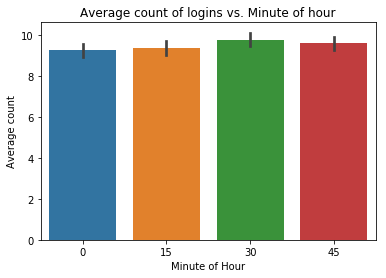

In [26]:
# Splitting into 15 minute intervals
indexed_logins_df_15T['15_minute'] = indexed_logins_df_15T[
    'login_time'].dt.minute
minutes = indexed_logins_df_15T
minute = minutes[['count', '15_minute']]
minute = minute.groupby('15_minute').sum().reset_index()
print(minute)

# Visualizing count of logins per quarter-hour
sns.barplot(x='15_minute', y='count', data=minutes)
plt.ylabel('Average count')
plt.xlabel('Minute of Hour')
plt.title('Average count of logins vs. Minute of hour')
plt.show()

We notice above that there is no apparent trend on a 15-minute interval basis of each hour. 

After our exploratory data analysis above, we can conclude that demand for Ultimate Technologies Inc. increases throughout the week starting on monday and peaks during weekends with the highest demand on Saturdays. Addtionally, without regards to days of the week, we observed that the peak popular times are during lunch times (11am-12pm) and nightlife entertainment time (11pm-4am).

#### Experiment and Metrics design

Our next challenges are to solve the following challenges of Gotham and Metropolis:

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the `key measure of success` of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a `practical experiment you would design` to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: <br>
a. how you will implement the experiment <br>
b. what statistical test(s) you will conduct to verify the significance of the
observation <br>
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats. <br>



To find the key measure success of the proposed experiment, we should look into whether the costs of implementation including the toll cost reimbursements will be lower compare to the additional income provided after implementation, thus we can analyze metrics that will include login times before and after implementation, the change in income this change in logins will bring (should be higher), and then subtract this with the cost of reimbursements to drivers to have our key metric of profit after toll costs reimbursement. 

To measure the significance of our experiment, we can devised a test group and control group and measure the change in profits and other relevant measures using a 1-sample z statistical test with a sample size of at least 30 driver partners. It's important that we continually measure all effective changes as without any new changes, people can respond to incentives. For instance, logins might increase leading to higher profit, but toll prices might increase due to higher demands on the bridge which might actually lead to lower profit after reimbursements. 

#### Predictive modeling

We are now given a new dataset with a new set of instructions and prompts:

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

##### Data description

* city: city this user signed up in
* phone: primary device for this user
* signup_date: date of account registration; in the form ‘YYYY MM DD’
* last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier > 1
* avg_surge: The average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
* weekday_pct: the percent of the user’s trips occurring during a weekday

In [30]:
# Load provided riders' json data into a pandas dataframe
import json 
file = open('/Users/kaizen/Data Science/Springboard/Challenges/ultimate_challenge/ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [31]:
# Initial EDA of our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [32]:
# Summary stats for each variable
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [37]:
# We notice above that there are less ratings by drivers and rides leading to missing values
# Fill in missing values by using the averages of the relevant columns 

# Impute in missing values
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['phone'].fillna('iPhone', inplace=True)

# Convert last trip and sign up columns to datetime objects
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


             city  trips_in_first_30_days
0         Astapor                   32219
1  King's Landing                   24957
2      Winterfell                   56734


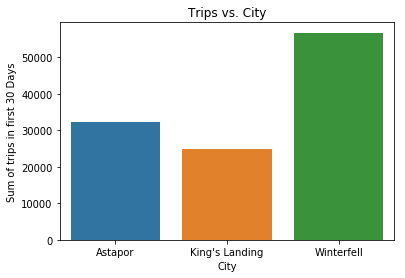

In [40]:
# We will visualize our data to get a better idea of how to increase retention rates 

# We start with examining the feature 'trips within the first 30 days'

# Create dataframe for city and trips
trips_city = (df[['trips_in_first_30_days', 'city', 'phone']].groupby('city').sum().reset_index())

# We see below that Winterfell has the most trips and likely the highest population
print(trips_city)

# Trips vs City plot
sns.barplot(x='city', y='trips_in_first_30_days', data=trips_city)
plt.ylabel('Sum of trips in first 30 Days')
plt.xlabel('City')
plt.title('Trips vs. City')
plt.show()

     phone  trips_in_first_30_days
0  Android                   29067
1   iPhone                   84843


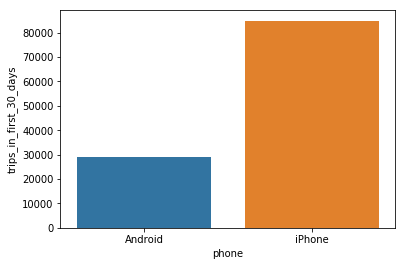

In [41]:
# Then we look at the difference between type of phones 

# Create dataframe for phone and trips
trips_phone= df[['trips_in_first_30_days', 'city', 'phone']].groupby('phone').sum().reset_index()
print(trips_phone)

# We see that there are more iPhone trips in first 30 days
sns.barplot(x='phone', y='trips_in_first_30_days', data=trips_phone)
plt.show()

Now, we construct a 6-month retention parameter for our dataset. If the user has taken a trip in 6-months before our last recorded data point, they are considered a retained user.

In [42]:
# Getting last trip date recorded
df[['last_trip_date']].max()

last_trip_date   2014-07-01
dtype: datetime64[ns]

In [43]:
# Active users
len(df[df['last_trip_date'] >= '2014-06-01'])

18804

In [44]:
# Non-active users
len(df[df['last_trip_date'] < '2014-06-01'])

31196

In [45]:
# Total users
len(df)

50000

In [46]:
# Entering the new parameters
df['retained'] = np.nan
df.loc[df['last_trip_date'] >= '2014-06-01', 'retained'] = 1
df.loc[df['last_trip_date'] < '2014-06-01', 'retained'] = 0
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0.0


In [47]:
# Retained users
df['retained'].sum()/len(df)

0.37608

#### EDA Insights 

- most users are in Winterfell
- 37.6% of users were retained

#### Predictive Modeling

We will now reformat our data for training and predicting retention rates

In [48]:
# Dropping date-time features for predictive modeling
df.drop('last_trip_date', axis=1, inplace=True)
df.drop('signup_date', axis=1, inplace=True)

# Attain our'retained' target values 
y = df['retained'].values

# Attain features
df = df.drop('retained', axis=1)
df

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.700000,1.10,King's Landing,iPhone,15.4,4,True,46.2
1,8.26,5.0,5.000000,1.00,Astapor,Android,0.0,0,False,50.0
2,0.77,5.0,4.300000,1.00,Astapor,iPhone,0.0,3,False,100.0
3,2.36,4.9,4.600000,1.14,King's Landing,iPhone,20.0,9,True,80.0
4,3.13,4.9,4.400000,1.19,Winterfell,Android,11.8,14,False,82.4
5,10.56,5.0,3.500000,1.00,Winterfell,iPhone,0.0,2,True,100.0
6,3.95,4.0,4.601559,1.00,Astapor,Android,0.0,1,False,100.0
7,2.04,5.0,5.000000,1.00,Winterfell,iPhone,0.0,2,False,100.0
8,4.36,5.0,4.500000,1.00,Winterfell,Android,0.0,2,False,100.0
9,2.37,5.0,4.601559,1.00,Winterfell,Android,0.0,1,False,0.0


In [49]:
# One-hot-encode for categorical features via .get_dummies pandas method
df_encoded = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'])
df_encoded.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,0,1,0,0,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,1,0,0,1,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,1,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,0,1,0,0,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,0,1,1,0,1,0


In [50]:
# Examine new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
phone                     50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(2)
memory usage: 3.5+ MB


In [56]:
# Features array after one-hot encoding
X = df_encoded.values

array([ 3.67,  5.  ,  4.7 ,  1.1 , 15.4 ,  4.  , 46.2 ,  0.  ,  1.  ,
        0.  ,  0.  ,  1.  ,  0.  ,  1.  ])

In [57]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

We will use a neural network for our modeling and prediction tasks. 

We start development of our neural network with TensorFlow and Keras. The Sequential package will be used to initalize our neural network. The Dense package will be used to layer our neural network.

In [58]:
# First scale our features to speed up training 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
# Importing TensorFlow and the Keras libraries with packages
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense

/Users/kaizen/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [60]:
# Initializing the Neural Network
classifier = Sequential()

We add our first layer which takes 14 inputs and has 7 neurons. Generally, we pick a neuron count which is averaged between input (11) and output (1) counts. We use a rectifier(general) activation function for our middle layers and a sigmoid (probablity) function for our final output.

In [61]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = 14))

# Adding the second hidden layer
classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

To compile our neural network, we use an 'Adam' optimizer, an excellent algorithm for first-order gradient-based optimization of stochastic objective functions, based on adaptive estimates of lower-order moments. We use a log loss function, binary crossentropy. since it works well with our sigmoid function. Our metrics will be accurate since that is what we are most concerned about for our model.

In [62]:
# Compiling the Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [63]:
# Fitting the Neural Network to the Training set
classifier.fit(X_train, y_train, batch_size = 16, epochs = 10)

Epoch 1/10
40000/40000 [==============================] - 4s 100us/step - loss: 0.5465 - acc: 0.7289
Epoch 2/10
40000/40000 [==============================] - 4s 91us/step - loss: 0.5009 - acc: 0.7620
Epoch 3/10
40000/40000 [==============================] - 4s 90us/step - loss: 0.4925 - acc: 0.7680
Epoch 4/10
40000/40000 [==============================] - 4s 91us/step - loss: 0.4896 - acc: 0.7702
Epoch 5/10
40000/40000 [==============================] - 4s 92us/step - loss: 0.4878 - acc: 0.7713
Epoch 6/10
40000/40000 [==============================] - 4s 95us/step - loss: 0.4861 - acc: 0.7734
Epoch 7/10
40000/40000 [==============================] - 4s 102us/step - loss: 0.4846 - acc: 0.7733
Epoch 8/10
40000/40000 [==============================] - 4s 101us/step - loss: 0.4835 - acc: 0.7757
Epoch 9/10
40000/40000 [==============================] - 4s 106us/step - loss: 0.4826 - acc: 0.7764
Epoch 10/10
40000/40000 [==============================] - 5s 119us/step - loss: 0.4821 - acc: 0

In [64]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5533  718]
 [1541 2208]]


In [65]:
# Visualizing confusion matrix
pos, neg = cm
tp, fp = pos
fn, tn = neg
print('True Positives:', tp)
print('True Negatives:', tn)
print('False Positives:', fp)
print('False Negatives:', fn)

True Positives: 5533
True Negatives: 2208
False Positives: 718
False Negatives: 1541


In [66]:
# Accuracy rate of confusion matrix
print('Accuracy:', (tp+tn)/(tp+tn+fp+fn))

Accuracy: 0.7741


In [67]:
retained = pd.DataFrame(y)
retained.columns = ['retained']
pd.concat([df_encoded, retained],
          axis=1).corr().iloc[14].sort_values(
    ascending=False)

retained                     1.000000
city_King's Landing          0.262284
phone_iPhone                 0.225464
trips_in_first_30_days       0.210463
ultimate_black_user_True     0.205002
surge_pct                    0.011797
weekday_pct                  0.009693
avg_surge                   -0.003333
avg_rating_of_driver        -0.010829
avg_rating_by_driver        -0.026748
city_Winterfell             -0.046611
avg_dist                    -0.092780
city_Astapor                -0.174655
ultimate_black_user_False   -0.205002
phone_Android               -0.225464
Name: retained, dtype: float64

The features most correlated to retention are: Users in King's landing, iPhone users, and users who took Ultimate black and first trip in first 30 days.

In order for Ultimate to further improve retention rates, they should look into each of these variables in detail and then use A/B testing and experiments to test whether new changes should be implemented to improve retention. 